__Kunskapskontroll 3 - Analys av en datafil__

In [1]:
""" A tool to analyze and tidy up a data table

This tool allows you to analyze and tidy up a data table.

You can:
- Remove duplicate rows
- Remove rows with missing values
- Save the edited data to a new file
"""

import pandas as pd

# *** Load data ***
df = pd.read_csv('housing.csv')

# *** List available columns ***
print("Available columns:")
print(df.columns)


# *** Select editing options ***
while True:
    print("Select editing options:")
    print("1. Remove duplicate rows")
    print("2. Remove rows with missing values")
    print("3. Save data")
    edit_option = input("Enter the number of the editing option: ")
# *** Remove duplicate rows ***
    if edit_option == "1":
        # *** List duplicate rows ***
        duplicate_rows = df[df.duplicated()]
        print("Duplicate rows:")
        if duplicate_rows.empty:
            print("No duplicate rows found")
            continue
        else:
            print(duplicate_rows)
        do_option = input("Do you want to remove duplicate rows? (y/n): ")
        if do_option == "y":
            df = df.drop_duplicates()
            print("Duplicate rows removed")
        else:
            print("Duplicate rows not removed")

    # *** Remove rows with missing values ***
    elif edit_option == "2":
        # *** List rows with missing values ***
        missing_values = df[df.isnull().any(axis=1)]
        print("Rows with missing values:")
        if missing_values.empty:
            print("No rows with missing values found")
        else:
            print(missing_values)
        do_option = input("Do you want to remove rows with missing values? (y/n): ")
        if do_option == "y":
            df = df.dropna()
            print("Rows with missing values removed")
        else:
            print("Rows with missing values not removed")

    # *** Save data ***
    elif edit_option == "3":
        break

df.to_csv('data_edited.csv', index=False)



print("Data saved to data_edited.csv")


Available columns:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Select editing options:
1. Remove duplicate rows
2. Remove rows with missing values
3. Save data


Enter the number of the editing option:  1


Duplicate rows:
No duplicate rows found
Select editing options:
1. Remove duplicate rows
2. Remove rows with missing values
3. Save data


Enter the number of the editing option:  2


Rows with missing values:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  househ

Do you want to remove rows with missing values? (y/n):  y


Rows with missing values removed
Select editing options:
1. Remove duplicate rows
2. Remove rows with missing values
3. Save data


Enter the number of the editing option:  3


Data saved to data_edited.csv


Select original or edited data (o/e):  e


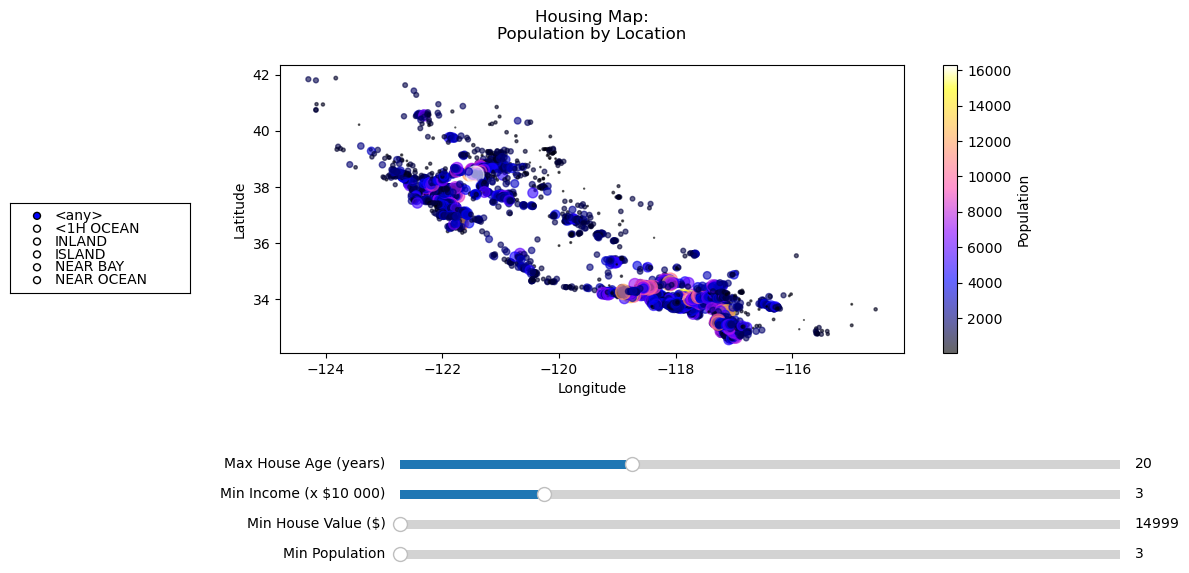

In [2]:
""" Interactive housing map

This tool allows you to filter the housing data by age, income, house value, population, and proximity to the ocean.
Interactive sliders and radio buttons allow you to adjust the filters and see the results immediately.
"""

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, RadioButtons

# *** Load data ***

# *** Select original or edited data ***
file_sel = input("Select original or edited data (o/e): ")
if file_sel == "o":
    df = pd.read_csv('housing.csv')
elif file_sel == "e":
    df = pd.read_csv('data_edited.csv')

# *** Colour map - for a selection of possible options see https://matplotlib.org/stable/users/explain/colors/colormaps.html***
cmap = plt.cm.gnuplot2 

# *** Plot setup ***
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(left=0.25, bottom=0.4)  # Make room for sliders and radio buttons

# *** Add sliders - These are value filters that can be interactively applied to the data ***
ax_age = plt.axes([0.35, 0.20, 0.6, 0.03])
ax_income = plt.axes([0.35, 0.15, 0.6, 0.03])
ax_value = plt.axes([0.35, 0.10, 0.6, 0.03])
ax_population = plt.axes([0.35, 0.05, 0.6, 0.03])

age_slider = Slider(ax_age, 'Max House Age (years)', 1, 60, valinit=20)
income_slider = Slider(ax_income, 'Min Income (x $10 000)', 0.0, 15.0, valinit=3.0)
value_slider = Slider(ax_value, 'Min House Value ($)', int(df['median_house_value'].min()), int(df['median_house_value'].max()), valinit=int(df['median_house_value'].min()))
population_slider = Slider(ax_population, 'Min Population', int(df['population'].min()), int(df['population'].max()), valinit=int(df['population'].min()))

# *** Add radio buttons for proximity - These are categorical filters that can be interactively applied to the data ***
ocean_options = ['<any>'] + sorted(df['ocean_proximity'].unique())
ax_proximity = plt.axes([0.025, 0.5, 0.15, 0.15])
proximity_radio = RadioButtons(ax_proximity, ocean_options, active=0)

# *** Filtering function - This is the function that applies the filters to the data in the dataframe and returns the filtered dataframe ***
def filter_data(age, income, house_value, population, proximity):
    filtered = df[
        (df['housing_median_age'] <= age) &
        (df['median_income'] >= income) &
        (df['median_house_value'] >= house_value) &
        (df['population'] >= population)
    ]
    if proximity != '<any>':
        filtered = filtered[filtered['ocean_proximity'] == proximity]
    return filtered

# *** Initial data - This is the data that is displayed when the plot is first created ***
initial_data = filter_data(20, 3.0, int(df['median_house_value'].min()), int(df['population'].min()), '<any>')
sizes = initial_data['population'] / 100
scatter = ax.scatter(
    initial_data['longitude'], # uses the longitude column from the dataframe to plot real locations on the map
    initial_data['latitude'], # uses the latitude column from the dataframe to plot real locations on the map
    c=initial_data['population'], # uses the population column from the dataframe to colour the points
    s=sizes, # uses the population column from the dataframe to size the points
    cmap=cmap, # uses the colour map to colour the points
    alpha=0.6 # sets the transparency of the points
)

# *** Set the title and labels for the plot ***
ax.set_title(r"Housing Map:"+"\n"+"Population by Location"+"\n")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.colorbar(scatter, label='Population')

# *** Define the update function - This is the function that is called when the sliders or radio buttons are changed ***
def update(val):
    filtered = filter_data(
        age_slider.val,
        income_slider.val,
        value_slider.val,
        population_slider.val,
        proximity_radio.value_selected
    )
    if not filtered.empty:
        scatter.set_offsets(filtered[['longitude', 'latitude']].values)
        scatter.set_array(filtered['population'].values)
        sizes = filtered['population'] / 100
        scatter.set_sizes(sizes)
        ax.relim()
        ax.autoscale_view()
    fig.canvas.draw_idle()

# *** Register the interactive update function with each widget ***
age_slider.on_changed(update)
income_slider.on_changed(update)
value_slider.on_changed(update)
population_slider.on_changed(update)
proximity_radio.on_clicked(update)

plt.show()

__Självutvärdering:__
1. Vad har varit utmanande?
   - Att hitta ett kreativt angreppssätt, jag snurrade ett tag på kolumnerna med rum och sovrum men fann att de var ganska ointressanta.
     Jag kom på att jag inte ville göra ett otal diagram, istället ville jag skapa en interaktiv widget med filterreglage, då blev bilden klar.
     Koden gav sig själv när målet var tydligt.
   - Att försöka hitta ett sätt att pesentera interaktivt innehåll i Jupyter var ganska utmanande, ryktesvägen sägs det att det kan gå i Jupyter Labs,
     men jag kom inte fram där heller. Möjligen skulle "plotly"-biblioteket fungera, men det kändes out of scope till denna uppgift.
2. Jag tycker själv att dessa två script är värda en fullpoängare, de svarar på frågan, med en viss finess. Men jag är medveten om att jag är en
   "Good enough" programmerare så det finns naturigtvis punkter i dessa som man kan kritisera.
3. Kursens bredd hittills är bra, vissa delar är repetition för mig, men matten och matriser som ekvationer är helt nytt för mig.